### Profile likelihood ratio calculator

using the [RooStats::ProfileLikelihoodCalculator](https://root.cern.ch/doc/v606/classRooStats_1_1ProfileLikelihoodCalculator.html) from the model and data stored in [model.root](ex02_build_Poisson.ipynb)

First open the ROOT file

In [1]:
TFile* f = TFile::Open("model.root") ;


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Retrieve the workspace

In [2]:
RooWorkspace* w = (RooWorkspace*)f->Get("w") ;
w->Print() ;


RooWorkspace(w) w contents

variables
---------
(B,Nobs_CR,Nobs_SR,S,mu,tau)

p.d.f.s
-------
RooProdPdf::model[ model_SR * model_CR ] = 0.00144134
RooPoisson::model_CR[ x=Nobs_CR mean=Nexp_CR ] = 0.0281977
RooPoisson::model_SR[ x=Nobs_SR mean=Nexp_SR ] = 0.0511153

functions
--------
RooFormulaVar::Nexp_CR[ actualVars=(tau,B) formula="tau*B" ] = 200
RooFormulaVar::Nexp_SR[ actualVars=(mu,S,B) formula="mu*S+B" ] = 30

datasets
--------
RooDataSet::observed_data(Nobs_SR,Nobs_CR)

parameter snapshots
-------------------
ModelConfig__snapshot = (mu=1)

named sets
----------
ModelConfig_NuisParams:(B)
ModelConfig_Observables:(Nobs_SR,Nobs_CR)
ModelConfig_POI:(mu)
ModelConfig__snapshot:(mu)
obs:(Nobs_SR,Nobs_CR)

generic objects
---------------
RooStats::ModelConfig::ModelConfig



Retrieve the ModelConfig and the observed data
Together these uniquely define the statistical problem

In [3]:
RooAbsData* data = w->data("observed_data") ;
RooStats::ModelConfig* mc = (RooStats::ModelConfig*) w->obj("ModelConfig") ;

Instantiate a Profile Likelihood interval calculator

In [4]:
RooStats::ProfileLikelihoodCalculator plCalc(*data,*mc);

Calculate the 90% C.L. interval

**Note** that Profile Likelihood Ratio is always a two-sided interval where the definition of the interval is always uniquely defined by the technique hence we only need to define the CL.

In [5]:
plCalc.SetConfidenceLevel(0.90);
RooStats::LikelihoodInterval* interval = plCalc.GetInterval();

[#1] INFO:Minization -- createNLL: caching constraint set under name CONSTR_OF_PDF_model_FOR_OBS_Nobs_CR:Nobs_SR with 0 entries
[#0] PROGRESS:Minization -- ProfileLikelihoodCalcultor::DoGLobalFit - find MLE 
[#0] PROGRESS:Minization -- ProfileLikelihoodCalcultor::DoMinimizeNLL - using Minuit / Migrad with strategy 1
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (model_SR,model_CR)
[#1] INFO:Minization -- 
  RooFitResult: minimized FCN value: 6.10022, estimated distance to minimum: 3.4662e-09
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                     B    2.0000e+01 +/-  1.41e+00
                    mu    4.9998e-01 +/-  5.18e-01



Print the result

In [6]:
RooRealVar* poi = (RooRealVar*) mc->GetParametersOfInterest()->first();
double lowerLimit = interval->LowerLimit(*poi);
double upperLimit = interval->UpperLimit(*poi);
cout << "RESULT: " << 100*plCalc.ConfidenceLevel() << "% interval is : ["<< lowerLimit << ", "<< upperLimit <<"] "<<endl;

RESULT: 90% interval is : [-0.27595, 1.44104] 


Use the visualization tool of the PLC to show how the interval was calculated

[#1] INFO:Minization -- RooProfileLL::evaluate(nll_model_observed_data_Profile[mu]) Creating instance of MINUIT
[#1] INFO:Minization -- RooProfileLL::evaluate(nll_model_observed_data_Profile[mu]) determining minimum likelihood for current configurations w.r.t all observable
[#1] INFO:Minization -- RooProfileLL::evaluate(nll_model_observed_data_Profile[mu]) minimum found at (mu=0.50042)
......................................................................................................

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


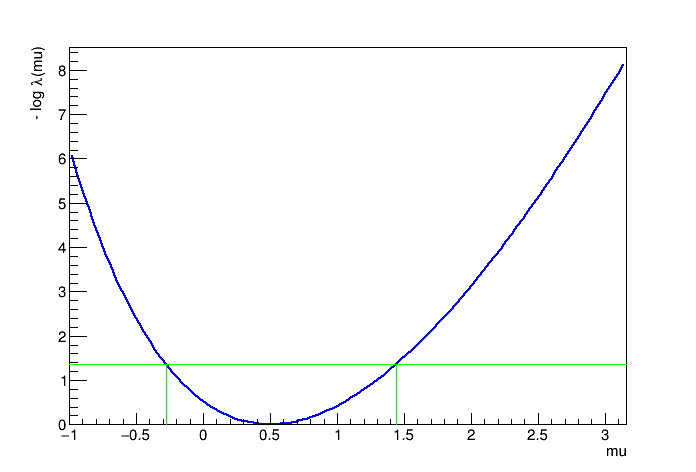

In [7]:
RooStats::LikelihoodIntervalPlot *plot = new RooStats::LikelihoodIntervalPlot(interval);
//plot->SetNPoints(50);   // Use this to reduce sampling granularity (trades speed for precision)
plot->Draw("TF1"); gPad->Draw();